In [1]:
import sys
sys.path.insert(0, '../../gaps_topology/Tilings') # prepend the path to the Tilings package
import Tilings as tl
import AB_envs as envs
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

# interactivity in the notebook
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

# replace inline by %matplotlib notebook for full interactivity (but beware of the flickering!)
%matplotlib inline
# plt.rcParams['figure.figsize'] = (15.0, 15.0)

In [2]:
def periodic(x, y):
    """
    A periodic function on the plane
    """
    return np.cos(x) + np.cos(y)

# styling
BostonBlue = np.array([0., 104., 139.])/255
comp = np.array([200., 35., 0.])/255

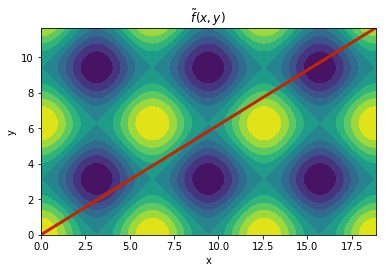

In [3]:
"""
2D plot
"""
om = 2./(1.+np.sqrt(5))

Nx, Ny = (10**3,10**3)
x = np.linspace(0, 6*np.pi, Nx)
y = np.linspace(0, 6*np.pi*om, Ny)
xv, yv = np.meshgrid(x, y)
zv = periodic(xv, yv)

fig, ax = plt.subplots(1,1)
ax.plot(x, om*x, '-', c=comp, lw = 3.)
ax.set_ylim([0,np.max(y)])
ax.contourf(xv, yv, zv, 10, cmap=plt.cm.viridis)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(r"$\tilde f(x,y)$")
ax.set_aspect('equal')
fig.savefig("periodic_function.eps")

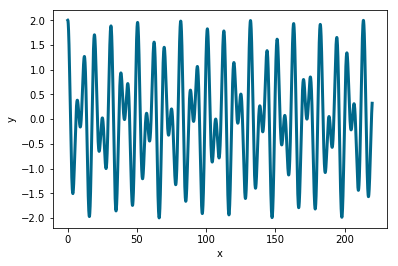

In [6]:
"""
Plot a cut of the periodic function along a line
"""
om = 2./(1.+np.sqrt(5))
x = np.arange(0, 70*np.pi, 0.001)
cut = periodic(x, om*x)

fig, ax = plt.subplots(1,1)
ax.plot(x, cut, '-', c=BostonBlue, lw=3.)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.savefig("periodic_function_cut.eps")

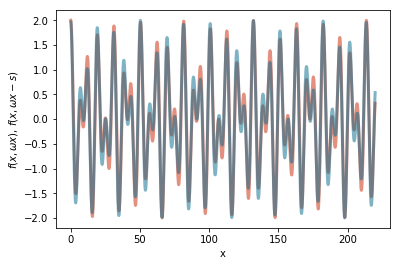

In [7]:
"""
Plot a cut of the periodic function along a line
"""
om = 2./(1.+np.sqrt(5))
x = np.arange(0, 70*np.pi, 0.001)
cut = periodic(x, om*x)
shift = 50.
shifted_cut = periodic(x, om*x - shift)


fig, ax = plt.subplots(1,1)
lw = 3.
ax.plot(x, cut, '-', c=comp, alpha=0.5, lw=lw)
ax.plot(x, shifted_cut, '-', c=BostonBlue, alpha=0.5, lw=lw)
ax.set_xlabel("x")
ax.set_ylabel(r"$f(x, \omega x)$, $f(x, \omega x - s)$")
fig.savefig("periodic_function_cut_shift.pdf")

In [9]:
def cut(slope, shift):
    """
    Plot the cut for various slopes and shifts of the origin.
    """
    fig, ax = plt.subplots(1, 2)
    x = np.arange(0, 30*np.pi, 0.1)
    cut = periodic(x, slope*x)
    shifted_cut = periodic(x, slope*x - shift)
    ax[0].plot(x, cut, '-')
    ax[0].plot(x, shifted_cut, '-')
    
    
    nx, ny = (10**3,10**3)
    x = np.linspace(0, 6*np.pi, nx)
    y = np.linspace(0, 6*np.pi, ny)
    xv, yv = np.meshgrid(x, y)
    zv = periodic(xv, yv)
    ax[1].plot(x, slope*x + shift, 'r-', lw = 3.)
    ax[1].set_ylim([0,np.max(y)])
    ax[1].contourf(xv, yv, zv, 10, cmap=plt.cm.viridis)
    ax[1].set_aspect('equal')
    
    plt.show()

In [12]:
w = interactive(cut, slope = om, shift = (0., 12.))
display(w)

In [145]:
ninfl = 5
approx = tl.A5(envs.squareCanonical)
approx.it_sub(ninfl)

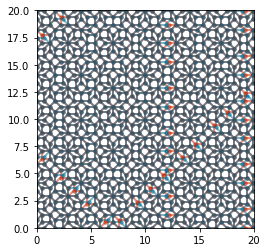

In [196]:
def html(rgb_tuple):
    """ convert an (R, G, B) tuple to #RRGGBB """
    hexcolor = '#%02x%02x%02x' % tuple([int(255*val) for val in rgb_tuple])
    # that's it! '%02x' means zero-padded, 2-digit hex values
    return hexcolor

# retrive position
pos = nx.get_node_attributes(approx._graph, "para")
# projection matrix
para = approx.para()
# basis vectors
e = np.eye(4)
# shift the postitions of the nodes
a = e[1] - e[3]
b = e[1] + e[3]
shift = np.dot(para, 7*e[0]+5*a)# + 7*e[2]+5*b)
shifted_pos = {p:pos[p]-shift for p in pos}
s = 12.
lw = 2.
fig, ax = plt.subplots(1, 1)
nx.draw_networkx(approx._graph, pos, with_labels=False,
                 node_size=s, width=lw, edge_color=html(comp), node_color=comp, alpha=0.5, ax=ax)
nx.draw_networkx(approx._graph, shifted_pos, with_labels=False,
                 node_size=s, width=lw, edge_color=html(BostonBlue), node_color=BostonBlue, alpha=0.5, ax=ax)

x0, y0 = 0, 0
L = 20
ax.set_xlim([x0,x0+L])
ax.set_ylim([y0,y0+L])
ax.set_aspect('equal')
fig.savefig("AB_shift.pdf")